In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Matrice de Confusion

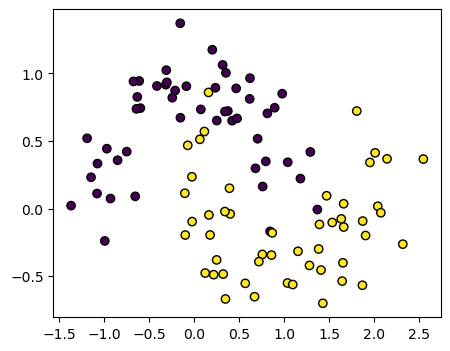

In [2]:
x, y = make_moons(n_samples=100, noise=0.2, random_state=42)
plt.figure(figsize=(5,4))
plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
plt.show()

In [3]:
knn = KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier()

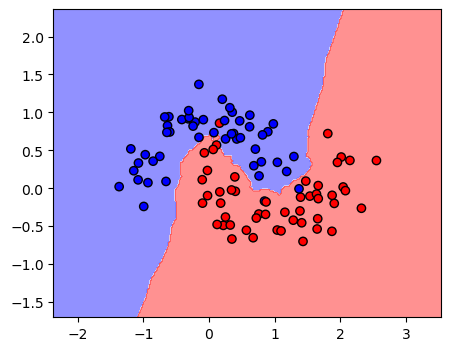

In [4]:
h = 0.02 # step size in the meshrig
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(5,4))
plt.contourf(xx, yy, z, alpha = 0.5, cmap='bwr')
plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k', cmap='bwr')
plt.show()

In [5]:
y_pred = knn.predict(x)

cm = confusion_matrix(y, y_pred)

print ("confusion matrix\n", cm)

confusion matrix
 [[47  3]
 [ 1 49]]


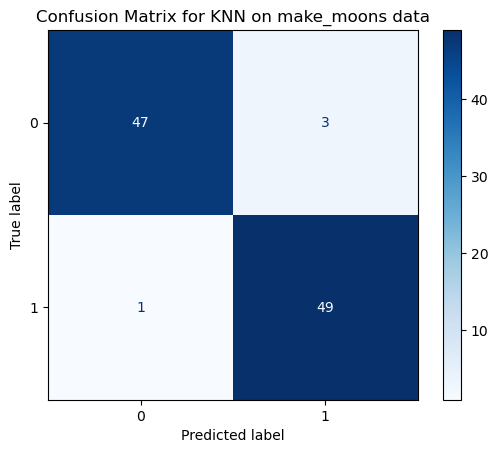

In [6]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN on make_moons data')
plt.show()

## Accuracy

In [7]:
accuracy_score(y, y_pred)

0.96

## Precision
Lorsque ce qui compte le plus est la capacité du modèle à e pas se tromper dans ses prédictions de positifs (ne pas prédire qu'un patient est malade alors qu'il ne l'est pas)

In [8]:
precision_score(y, y_pred)

0.9423076923076923

## Recall
Lorsque ce qui compte est de trouver un maximun de positifs, quitte à faire quelques erreurs (pas exempple: identifier tous les malades, même si au passage on confond quelques personnes pour non malades)

In [9]:
recall_score(y, y_pred)

0.98